In [16]:
options(width=75)
library(glue)
library(tidyverse)
library(quanteda)

── Attaching packages ────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  3.0.0     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ───────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::collapse() masks glue::collapse()
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()

Package version: 2.0.1

Parallel computing: 2 of 8 threads used.

See https://quanteda.io for tutorials and examples.


Attaching package: ‘quanteda’


The following object is masked from ‘jupyter:irkernel’:

    View


The following object is masked from ‘package:utils’:

    View




In [2]:
library(quanteda)
texts = c("The caged bird sings with a fearful trill", 
          "for the caged bird sings of freedom")
d = dfm(texts)
# Inspect by converting to a (dense) matrix
convert(d, "matrix") 

Package version: 1.5.2

Parallel computing: 2 of 8 threads used.

See https://quanteda.io for tutorials and examples.


Attaching package: ‘quanteda’


The following object is masked from ‘jupyter:irkernel’:

    View


The following object is masked from ‘package:utils’:

    View




,the,caged,bird,sings,with,a,fearful,trill,for,of,freedom
text1,1,1,1,1,1,1,1,1,0,0,0
text2,1,1,1,1,0,0,0,0,1,1,1


In [4]:
text = "I haven't seen John's derring-do"
tokens(text)

Tokens consisting of 1 document.
text1 :
[1] "I"          "haven't"    "seen"       "John's"     "derring-do"


In [5]:
haiku = "\u53e4\u6c60\u86d9\u98db\u3073\u8fbc\u3080\u6c34\u306e\u97f3"
tokens(haiku)

Tokens consisting of 1 document.
text1 :
[1] "古池"     "蛙"       "飛び込む" "水"       "の"       "音"      


In [77]:
library(tidyverse)
sotu = read_csv("http://cssbook.net/d/sotu.csv") %>% 
       mutate(doc_id = paste(lubridate::year(Date), President))
d = corpus(sotu) %>% dfm()
d

Parsed with column specification:
cols(
  FirstName = col_character(),
  President = col_character(),
  Date = col_date(format = ""),
  delivery = col_character(),
  type = col_character(),
  party = col_character(),
  text = col_character()
)



Document-feature matrix of: 85 documents, 17,999 features (91.0% sparse).

In [69]:
textstat_frequency(d)[c(1, 10, 100, 1000, 15000)]

,feature,frequency,rank,docfreq,group
,<chr>,<dbl>,<int>,<dbl>,<chr>
1,the,35020,1,85,all
10,our,9336,10,85,all
100,first,752,100,83,all
1000,investments,76,988,34,all
15000,defrauded,1,10972,1,all


In [76]:
as.matrix(d[c(3, 25, 50, 75), c("the", "our", "first", "investments", "defrauded")])

,the,our,first,investments,defrauded
1946 Truman,2142,186,21,2,0
1965 Johnson,283,81,14,0,0
1984 Reagan,209,92,8,0,0
2009 Obama,269,116,8,1,0


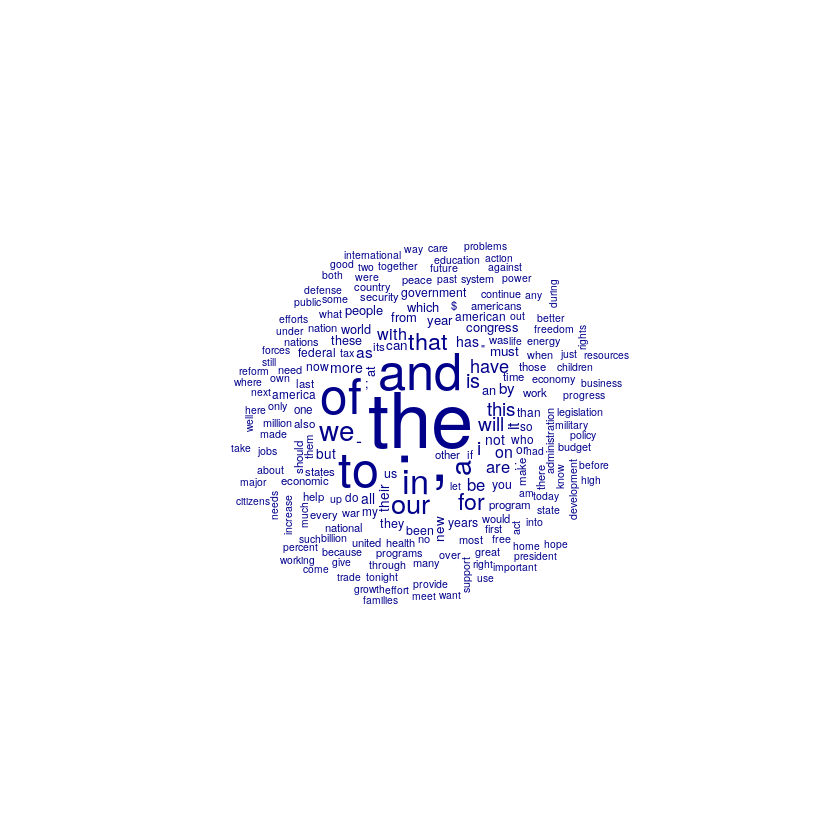

In [11]:
textplot_wordcloud(d, max_words=200)

In [15]:
url = "http://cssbook.net/d/trumptweets.csv"
tweets = read_csv(url, col_types=cols_only(text='c', status_id='c')) 
head(tweets)

status_id,text
<chr>,<chr>
x1864367186,Read a great interview with Donald Trump that appeared in The New York Times Magazine: http://tinyurl.com/qsx4o6
x9273573134835712,"Congratulations to Evan Lysacek for being nominated SI sportsman of the year. He's a great guy, and he has my vote! #EvanForSI"
x29014512646,"I was on The View this morning. We talked about The Apprentice. Tonight's episode is a great one--tough, exciting and surprising. 10 pm/NBC"
x7483813542232064,Tomorrow night's episode of The Apprentice delivers excitement at QVC along with appearances by Isaac Mizrahi and Cathie Black. 10 pm on NBC
x5775731054,"Donald Trump Partners with TV1 on New Reality Series Entitled, Omarosa's Ultimate Merger: http://tinyurl.com/yk5m3lc"
x14785576859340800,"I'll be appearing on Larry King Live for his final show, Thursday night at 9 p.m., CNN. Larry's been on TV for 25 years..."


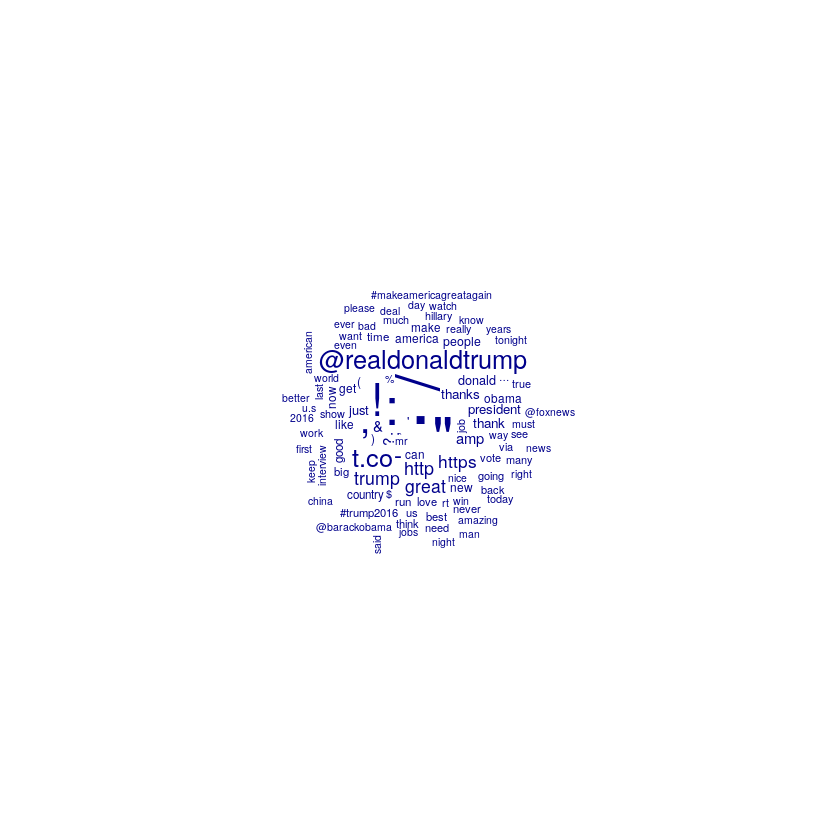

In [86]:
d = corpus(tweets) %>% dfm(remove=mystopwords)
textplot_wordcloud(d, max_words=100)



In [82]:
mystopwords = stopwords('english', source="snowball")
mystopwords = c( "go", "one", mystopwords)
glue("Now {length(mystopwords)} stopwords: {paste(mystopwords[1:5], collapse=', ')}...")



Now 177 stopwords: go, one, i, me, my...

In [94]:
d_trim = dfm_trim(d, min_docfreq = 0.005, max_docfreq = 0.75, docfreq_type = "prop")
glue("# of unique words before trimming: {ncol(d)}; after trimming: {ncol(d_trim)}")


# of unique words before trimming: 44496; after trimming: 316

In [103]:
d_tf = corpus(sotu) %>% dfm() %>% dfm_tfidf(scheme_tf="prop", smoothing=1)
as.matrix(d_tf [c(3, 25, 50, 75), c("the", "our", "first", "investments", "defrauded")])
slam::row_sums(d_tf)



,the,our,first,investments,defrauded
1946 Truman,0.02076537,0.001803155,0.0002070995,3.504238e-05,0
1965 Johnson,0.01732238,0.004957997,0.0008717439,0.000000e+00,0
1984 Reagan,0.01131977,0.004982864,0.0004407790,0.000000e+00,0
2009 Obama,0.01208793,0.005212641,0.0003657038,8.121631e-05,0


1945 Roosevelt  1945 Roosevelt.1       1946 Truman       1947 Truman 
        0.4745855         0.4426741         0.4653760         0.4372786 
      1948 Truman       1949 Truman       1950 Truman       1951 Truman 
        0.4120555         0.4219307         0.4051525         0.4066769 
      1952 Truman       1953 Truman   1953 Eisenhower   1954 Eisenhower 
        0.4132891         0.4449914         0.4544360         0.4416871 
  1955 Eisenhower   1956 Eisenhower 1956 Eisenhower.1   1957 Eisenhower 
        0.4421378         0.4421532         0.3985919         0.4454315 
  1958 Eisenhower   1959 Eisenhower   1960 Eisenhower   1961 Eisenhower 
        0.4463132         0.4434943         0.4640482         0.4799840 
     1961 Kennedy      1962 Kennedy      1963 Kennedy      1964 Johnson 
        0.4604038         0.4579105         0.4542360         0.4280784 
     1965 Johnson      1966 Johnson      1967 Johnson      1968 Johnson 
        0.4201699         0.4252387         0.4221783         0.4229442 
     1969 Johnson        1970 Nixon        1971 Nixon        1972 Nixon 
        0.4126504         0.4120966         0.4037628         0.4031407 
     1972 Nixon.1        1973 Nixon        1974 Nixon      1974 Nixon.1 
        0.4351195         0.4085100         0.3947782         0.4477963 
        1975 Ford         1976 Ford         1977 Ford       1978 Carter 
        0.4395518         0.4290748         0.4341942         0.4148563 
    1978 Carter.1       1979 Carter     1979 Carter.1       1980 Carter 
        0.4573835         0.4206966         0.4570502         0.4216374 
    1980 Carter.1       1981 Carter       1981 Reagan       1982 Reagan 
        0.4632719         0.4793569         0.4471723         0.4463469 
      1983 Reagan       1984 Reagan       1985 Reagan       1986 Reagan 
        0.4356201         0.4504097         0.4490913         0.4656150 
      1987 Reagan       1988 Reagan         1989 Bush         1990 Bush 
        0.4631079         0.4555997         0.4298188         0.4306407 
        1991 Bush         1992 Bush      1993 Clinton      1994 Clinton 
        0.4350639         0.4371200         0.4053016         0.4273942 
     1995 Clinton      1996 Clinton      1997 Clinton      1998 Clinton 
        0.4260138         0.4186132         0.4330340         0.4410811 
     1999 Clinton      2000 Clinton         2001 Bush         2002 Bush 
        0.4360235         0.4399915         0.4233385         0.4571419 
        2003 Bush         2004 Bush         2005 Bush         2006 Bush 
        0.4693629         0.4492995         0.4403525         0.4497880 
        2007 Bush         2008 Bush        2009 Obama        2010 Obama 
        0.4639448         0.4515547         0.4305574         0.4317151 
       2011 Obama        2012 Obama        2013 Obama        2014 Obama 
        0.4456988         0.4483634         0.4463209         0.4572862 
       2015 Obama        2016 Obama        2017 Trump        2018 Trump 
        0.4550108         0.4538648         0.4636854         0.4844716 
       2019 Trump 
        0.4961436

In [8]:
url = "http://cssbook.net/d/glove.6B.zip" # mirror of http://nlp.stanford.edu/data/glove.6B.zip
#if (!file.exists(""))
    unzip("glove.6B.zip")
if (!file.exists("glove.6B.zip")) download.file(url, "glove.6B.zip")


In [168]:
#wv_tibble = read_delim("glove.6B.50d.txt.zip", delim=" ", quote="", col_names = c("word", paste0("d", 1:50)))
wv_tibble = read_delim("glove.6B.50d.10k.w2v.txt", skip=1, delim=" ", quote="", col_names = c("word", paste0("d", 1:50)))
wv = as.matrix(wv_tibble[-1])
rownames(wv) = wv_tibble$word
#wv = wv / sqrt(rowSums(wv^2))
wv[order(wv[,1])[1:5], 1:5]


Parsed with column specification:
cols(
  .default = col_double(),
  word = col_character()
)

See spec(...) for full column specifications.



,d1,d2,d3,d4,d5
20003,-5.4593,0.89405,-0.29734,2.28540,0.0223550
ncaa,-2.4049,0.84421,-0.35441,0.99066,-0.9162500
footballer,-2.3669,0.33942,-1.31750,-0.45337,-0.3124400
basketball,-2.3654,1.33040,-0.52207,0.96469,-0.0084912
volleyball,-2.2447,0.97823,-1.39610,1.67180,-0.6615300


In [169]:
wvector = function(wv, word) wv[rownames(wv) == word,,drop=F]

normalize = function(x) x / sqrt(rowSums(x^2))

wv_similar = function(wv, target, n=5) {
  if (class(target) == "character") target = wvector(wv, target)
  similarities = normalize(wv) %*% t(normalize(target))
  similarities %>% as_tibble(rownames = "word") %>% 
    rename(similarity=2) %>% 
    #mutate(similarity = sqrt( pmax(similarity,0) / ncol(wv))) %>% 
    arrange(-similarity) %>% 
    head(n=n)  
}
wv_similar(wv, "fraud")

word,similarity
<chr>,<dbl>
fraud,1.0000000
charges,0.8591152
bribery,0.8559850
alleged,0.8415063
corruption,0.8299386


In [178]:
wv_analogy = function(wv, a, b, c) {
  result = (wvector(wv, b) + wvector(wv, c) - wvector(wv, a)) / 3
  matches = wv_similar(wv, result) %>% filter(!word %in% c(a,b,c))
  matches$word[1]
}

for (x in c("king", "boy", "father", "pete", "football")) {
    y = wv_analogy(wv, 'man', x, 'woman')
    print(glue("Man is to {x} as woman is to: {y}"))
}

Man is to king as woman is to: queen
Man is to boy as woman is to: girl
Man is to father as woman is to: mother
Man is to pete as woman is to: barbara
Man is to football as woman is to: soccer


In [183]:
gender <- function(wv, x) {
    x = normalize(wvector(wv, x))
    m_sim = x %*% t(normalize(wvector(wv, "male")))
    f_sim = x %*% t(normalize(wvector(wv, "female")))
    if (m_sim > f_sim) "male" else "female"
}
#for (x in c("king", "mary", "president", "nurse", "football", "soccer")) 
#    glue("{x} is {gender(x)}")
gender("queen")

    x = normalize(wvector(wv, "qeen"))

ERROR: Error in wvector(wv, x): argument "x" is missing, with no default
